## Using YOLOv5 pretrained for detection American Sign letter language

- ASL possesses a set of 26 signs known as the American manual alphabet, which can be used to spell out words from the English language. Such signs make use of the 19 handshapes of ASL. For example, the signs for 'p' and 'k' use the same handshape but different orientations. A common misconception is that ASL consists only of fingerspelling; although such a method (Rochester Method) has been used, it is not ASL.

- Fingerspelling is a form of borrowing, a linguistic process wherein words from one language are incorporated into another. In ASL, fingerspelling is used for proper nouns and for technical terms with no native ASL equivalent. There are also some other loan words which are fingerspelled, either very short English words or abbreviations of longer English words, e.g. O-N from English 'on', and A-P-T from English 'apartment'. Fingerspelling may also be used to emphasize a word that would normally be signed otherwise.

In [13]:
!pip install -U -q PyDrive

### Mounting Google Drive

In [14]:
#conrct to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load data

In [15]:
!unzip -o /content/gdrive/MyDrive/American_Sign_Language_Letters.v1-v1.yolov5pytorch.zip > /dev/null

### clone to github/yolov5

In [17]:
## clone to github/yolov5
!git clone https://github.com/ultralytics/yolov5
!pip install -qr yolov5/requirements.txt
%cd yolov5
#Import libraris
import torch
from IPython.display import Image, clear_output
import os
import shutil
clear_output()

In [18]:
#change location of data.yaml to yolov5 file
shutil.copy('/content/data.yaml' ,'/content/yolov5/data/data.yaml')

'/content/yolov5/data/data.yaml'

In [19]:
#extracting information from the roboflow file
%cat /content/yolov5/data/data.yaml

train: ../train/images

val: ../valid/images



nc: 26

names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [20]:
# define number of classes based on data.yaml
import yaml
with open("/content/yolov5/data/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])


# Yolov5m

In [31]:
%cat /content/yolov5/models/yolov5m.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license



# Parameters

nc: 80  # number of classes

depth_multiple: 0.67  # model depth multiple

width_multiple: 0.75  # layer channel multiple

anchors:

  - [10,13, 16,30, 33,23]  # P3/8

  - [30,61, 62,45, 59,119]  # P4/16

  - [116,90, 156,198, 373,326]  # P5/32



# YOLOv5 v6.0 backbone

backbone:

  # [from, number, module, args]

  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2

   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4

   [-1, 3, C3, [128]],

   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8

   [-1, 6, C3, [256]],

   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16

   [-1, 9, C3, [512]],

   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32

   [-1, 3, C3, [1024]],

   [-1, 1, SPPF, [1024, 5]],  # 9

  ]



# YOLOv5 v6.0 head

head:

  [[-1, 1, Conv, [512, 1, 1]],

   [-1, 1, nn.Upsample, [None, 2, 'nearest']],

   [[-1, 6], 1, Concat, [1]],  # cat backbone P4

   [-1, 3, C3, [512, False]],  # 13



   [-1, 1, Conv, [256, 1, 1]],

   [-1, 1, nn.Upsample, [None, 2, 'neare

In [32]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [33]:
%%writetemplate /content/yolov5/models/custom_yolov5m.yaml
# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.67  # model depth multiple
width_multiple: 0.75  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [34]:
# train yolov5m on custom data for 150 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 150 --data '../data.yaml' --cfg ./models/custom_yolov5m.yaml --weights '' --name yolov5m_results  --cache

/content/yolov5

WARNING ⚠️ invalid check_version(3.1.37, ) requested, please check values.

train: weights=, cfg=./models/custom_yolov5m.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest

github: up to date with https://github.com/ultralytics/yolov5 ✅

WARNING ⚠️ invalid check_version(5.9.5, ) requested, please check values.

YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)



hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weig

In [ ]:
!python detect.py --weights runs/train/yolov5m_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

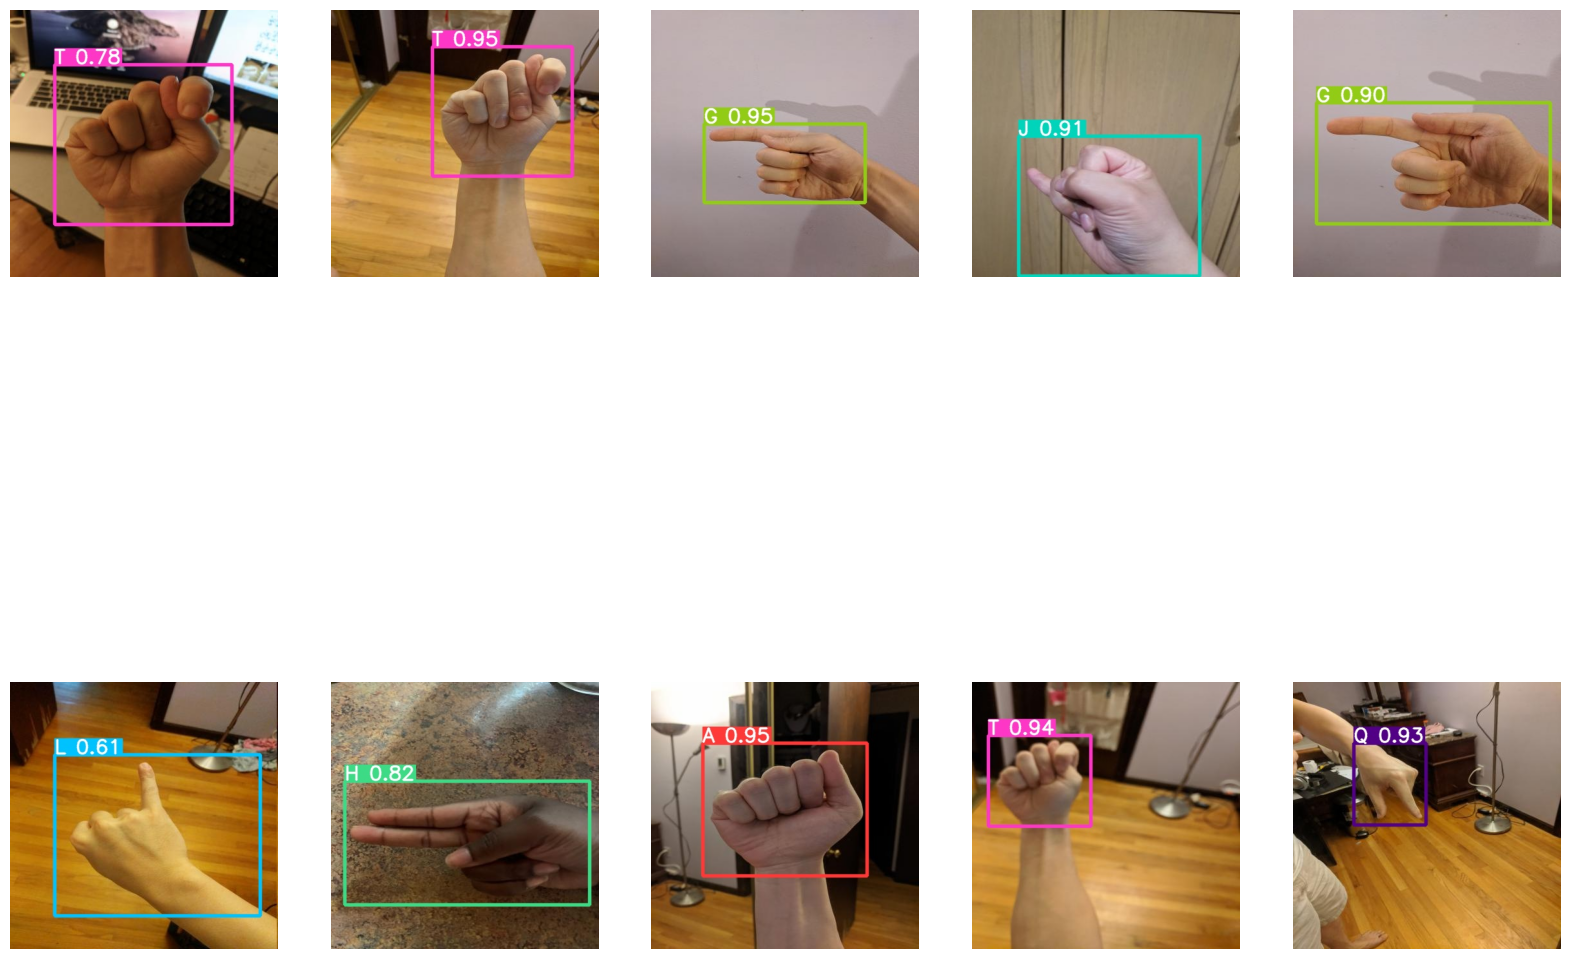

In [38]:
import glob
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 16))
axs = axs.flatten()

for i, imageName in enumerate(glob.glob('/content/yolov5/runs/detect/exp4/*.jpg')):
    if i >= 10:
        break
    img = plt.imread(imageName)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()